# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.058874e+01     7.287048e+00
 * time: 0.0017209053039550781
     1     2.842219e+01     6.019065e+00
 * time: 0.00725102424621582
     2     1.891213e+01     4.149803e+00
 * time: 0.01158595085144043
     3     1.323990e+01     3.062503e+00
 * time: 0.015748023986816406
     4     1.085131e+01     2.585607e+00
 * time: 0.01920485496520996
     5     1.019119e+01     1.903946e+00
 * time: 0.02265000343322754
     6     9.351697e+00     1.047438e+00
 * time: 0.026449918746948242
     7     8.745706e+00     1.031641e+00
 * time: 0.03015589714050293
     8     8.424056e+00     7.126952e-01
 * time: 0.03531789779663086
     9     8.289030e+00     7.433403e-01
 * time: 0.039810895919799805
    10     8.234572e+00     7.619374e-01
 * time: 0.043733835220336914
    11     8.188270e+00     6.313963e-01
 * time: 0.04825901985168457
    12     8.184647e+00     7.944737e-01
 * time: 0.05236101150512695
    13     8.132500e+00     4.718557e-01
 *

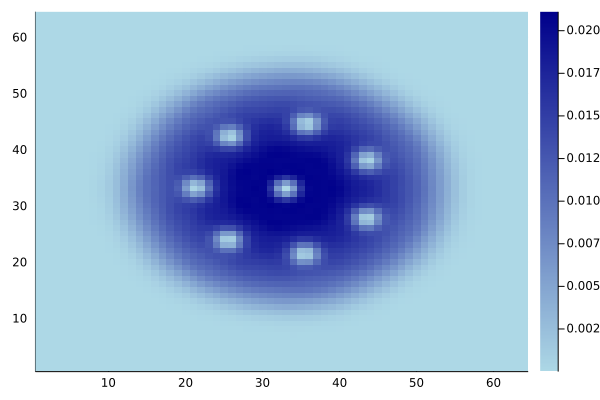

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)